In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
reference_df = pd.read_csv('RailReferences.csv')

In [7]:
reference_df.head()

,AtcoCode,TiplocCode,CrsCode,StationName,StationNameLang,GridType,Easting,Northing,CreationDateTime,ModificationDateTime,RevisionNumber,Modification
0,9100PENZNCE,PENZNCE,PNZ,Penzance Rail Station,NaN,U,147588,30599,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev
1,9100STIVES,STIVES,SIV,St Ives (Cornwall) Rail Station,NaN,U,151947,40127,2005-04-04T00:00:00,2011-09-30T14:47:28,4,rev
2,9100CARBISB,CARBISB,CBB,Carbis Bay Rail Station,NaN,U,152930,38745,2003-11-04T00:00:00,2011-09-30T14:47:28,5,rev
3,9100STERTH,STERTH,SER,St Erth Rail Station,NaN,U,154150,35730,2003-11-04T00:00:00,2007-02-13T17:06:21,3,rev
4,9100LELANTS,LELANTS,LTS,Lelant Saltings Rail Station,NaN,U,154430,36640,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev


In [8]:
reference_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2628 entries, 0 to 2627
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AtcoCode              2628 non-null   object 
 1   TiplocCode            2628 non-null   object 
 2   CrsCode               2628 non-null   object 
 3   StationName           2628 non-null   object 
 4   StationNameLang       0 non-null      float64
 5   GridType              2627 non-null   object 
 6   Easting               2628 non-null   int64  
 7   Northing              2628 non-null   int64  
 8   CreationDateTime      2628 non-null   object 
 9   ModificationDateTime  2628 non-null   object 
 10  RevisionNumber        2628 non-null   int64  
 11  Modification          2628 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 246.5+ KB


In [9]:
reference_df.isnull().sum()

AtcoCode                   0
TiplocCode                 0
CrsCode                    0
StationName                0
StationNameLang         2628
GridType                   1
Easting                    0
Northing                   0
CreationDateTime           0
ModificationDateTime       0
RevisionNumber             0
Modification               0
dtype: int64

In [10]:
sorted(reference_df.TiplocCode.unique())

['ABDARE',
 'ABDO',
 'ABDVY',
 'ABER',
 'ABGLELE',
 'ABRCYNS',
 'ABRDEEN',
 'ABRE',
 'ABRGVNY',
 'ABRYSTH',
 'ABWD',
 'ACBG',
 'ACHANLT',
 'ACHHSHL',
 'ACHILCK',
 'ACHNSHN',
 'ACKLNGT',
 'ACLE',
 'ACOCKSG',
 'ACRNGTN',
 'ACTNCTL',
 'ACTONML',
 'ADERLYP',
 'ADIEWEL',
 'ADISHAM',
 'ADLC',
 'ADLESTN',
 'ADNL',
 'ADWICK',
 'AGHTNPH',
 'AIGBURT',
 'AINSDAL',
 'AINTREE',
 'AIRBLES',
 'AIRDRIE',
 'AIRP',
 'ALBNYPK',
 'ALBRGHT',
 'ALDEDGE',
 'ALDMSTN',
 'ALDRSHT',
 'ALDTON',
 'ALERTN',
 'ALEXNDP',
 'ALFRETN',
 'ALLENSW',
 'ALLOA',
 'ALNESS',
 'ALNMOTH',
 'ALRESFD',
 'ALSAGER',
 'ALSHAM',
 'ALTHORN',
 'ALTNBRC',
 'ALTON',
 'ALTPE',
 'ALTRNHM',
 'ALVCHRC',
 'ALXANDR',
 'ALXPD',
 'AMBERGT',
 'AMERSHM',
 'AMLY',
 'AMMANFD',
 'ANCASTR',
 'ANDOVER',
 'ANDRSTN',
 'ANERLEY',
 'ANGELRD',
 'ANGMRNG',
 'ANNAN',
 'ANSDELL',
 'ANSL',
 'APBY',
 'APDR',
 'APERLYB',
 'APLYBDG',
 'APPLEFD',
 'APSLEY',
 'ARBROTH',
 'ARCHRAT',
 'ARDGAY',
 'ARDLUI',
 'ARDRSHB',
 'ARDRSSB',
 'ARDRSTN',
 'ARDWICK',
 'ARGYLST',
 'AR

In [11]:
df = pd.read_parquet('rail_data_cleaned_20230728132300.parquet')

In [12]:
df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,pass,platform,train_length,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure
8,202307277679020,L79020,2023-07-27,Darwin,STFD,NaT,2023-07-27 00:03:00,2023-07-27 00:03:30,NaT,NaT,None,5,None,2023-07-27 00:53:00,2023-07-27 00:53:00,True,True
10,202307277679020,L79020,2023-07-27,Darwin,SPNY205,NaT,2023-07-27 00:07:00,2023-07-27 00:13:30,NaT,NaT,None,None,None,2023-07-27 00:57:00,2023-07-27 00:58:00,True,True
16,202307277679020,L79020,2023-07-27,Darwin,PADTLL,NaT,2023-07-27 00:30:30,2023-07-27 00:31:00,NaT,NaT,None,B,None,2023-07-27 01:07:00,2023-07-27 01:07:00,True,True
17,202307277679020,L79020,2023-07-27,Darwin,WBRNPKS,NaT,2023-07-27 00:33:00,2023-07-27 00:35:00,NaT,NaT,None,A,None,2023-07-27 01:09:00,2023-07-27 01:10:00,True,True
22,202307277674553,L74553,2023-07-27,TD,SVNOAKS,NaT,2023-07-27 21:53:00,2023-07-27 21:54:30,2023-07-27 21:53:00,2023-07-27 21:54:00,None,1,8,NaT,NaT,False,False


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37100 entries, 8 to 94243
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   route_id                37100 non-null  object        
 1   unique_id               37100 non-null  object        
 2   service_start_date      37100 non-null  object        
 3   update_origin           36515 non-null  object        
 4   train_platform          37100 non-null  object        
 5   working_time_pass       0 non-null      datetime64[ns]
 6   working_time_arrival    37100 non-null  datetime64[ns]
 7   working_time_departure  37100 non-null  datetime64[ns]
 8   planned_time_arrival    33855 non-null  datetime64[ns]
 9   planned_time_departure  33580 non-null  datetime64[ns]
 10  pass                    0 non-null      object        
 11  platform                34114 non-null  object        
 12  train_length            10595 non-null  object

In [14]:
sorted(df.train_platform.unique())

['ABDO',
 'ABDVY',
 'ABER',
 'ABGLELE',
 'ABHLJN',
 'ABRCYNS',
 'ABRD27',
 'ABRDEEN',
 'ABRE',
 'ABRGVNY',
 'ABWD',
 'ACBG',
 'ACLE',
 'ACOCKSG',
 'ACRNGTN',
 'ACTCWHF',
 'ACTNCTL',
 'ACTONML',
 'ADERLYP',
 'ADIEWEL',
 'ADISHAM',
 'ADLC',
 'ADLESTN',
 'ADNL',
 'ADWICK',
 'AGHTNPH',
 'AIGBURT',
 'AINSDAL',
 'AINTREE',
 'AIRBLES',
 'AIRD754',
 'AIRDRIE',
 'ALBNYPK',
 'ALBRGHT',
 'ALDEDGE',
 'ALDMSTN',
 'ALDRSHT',
 'ALDTON',
 'ALERTN',
 'ALEXNDP',
 'ALFRETN',
 'ALLENSW',
 'ALNESS',
 'ALNMOTH',
 'ALRESFD',
 'ALSAGER',
 'ALSHAM',
 'ALSTONS',
 'ALTHORN',
 'ALTPE',
 'ALTRNHM',
 'ALVCHRC',
 'ALXANDR',
 'ALXPD',
 'AMBERGT',
 'AMLY',
 'AMMANFD',
 'ANCASTR',
 'ANDOVER',
 'ANDRSTN',
 'ANERLEY',
 'ANGMRNG',
 'ANNAN',
 'ANSL',
 'APBY',
 'APDR',
 'APERLYB',
 'APLYBDG',
 'APPLEFD',
 'APSLEY',
 'ARBROTH',
 'ARBRUNS',
 'ARCHRAT',
 'ARDGAY',
 'ARDLUI',
 'ARDRSSB',
 'ARDRSTN',
 'ARGYLST',
 'ARLSEY',
 'ARMDALE',
 'ARMTHWT',
 'ARNSIDE',
 'ARRAM',
 'ARUNDEL',
 'ASCOT',
 'ASFDMSX',
 'ASFIELD',
 'ASHBRYS',
 'A

In [15]:
df.isnull().sum()

route_id                      0
unique_id                     0
service_start_date            0
update_origin               585
train_platform                0
working_time_pass         37100
working_time_arrival          0
working_time_departure        0
planned_time_arrival       3245
planned_time_departure     3520
pass                      37100
platform                   2986
train_length              26505
actual_arrival_time        5331
actual_departure_time      2716
is_delayed_arrival            0
is_delayed_departure          0
dtype: int64

In [ ]:
# Analzying and visualizing peak hours of train activity

In [16]:
# Extract hour from arrival and departure times
df['arrival_hour'] = df['actual_arrival_time'].dt.hour
df['departure_hour'] = df['actual_departure_time'].dt.hour

In [17]:
# Group by hour and count arrivals and departures
arrival_counts = df.groupby('arrival_hour').size()
departure_counts = df.groupby('departure_hour').size()

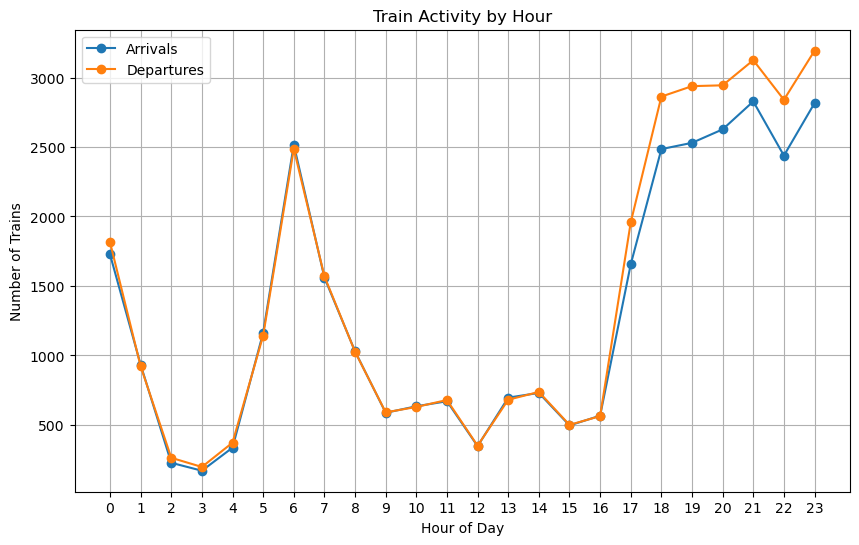

In [18]:
plt.figure(figsize=(10, 6))

plt.plot(arrival_counts.index, arrival_counts.values, label='Arrivals', marker='o')
plt.plot(departure_counts.index, departure_counts.values, label='Departures', marker='o')

plt.title('Train Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trains')
plt.xticks(range(24))
plt.grid(True)
plt.legend()

plt.show()

In [ ]:
# Analyzing Routes, trains, and stations - finding the most popular of each

In [19]:
popular_routes = df['route_id'].value_counts()
popular_trains = df['unique_id'].value_counts()
popular_stations = df['train_platform'].value_counts()

In [20]:
top_15_routes = popular_routes.head(15)
print(top_15_routes)

202307288955129    120
202307278954552     92
202307288953932     75
202307288954816     66
202307288954723     64
202307288024468     63
202307288024213     63
202307288025823     63
202307288024702     63
202307288057280     62
202307288950413     61
202307278075392     59
202307277684948     59
202307278726895     57
202307278933483     57
Name: route_id, dtype: int64


In [21]:
top_15_stations = popular_stations.head(15)
print(top_15_stations)

LNDNBDE    317
WLOE       166
ECROYDN    147
CRKLWD     147
STKP       147
VAUXHLM    132
RDNGSTN    123
CLPHMJM    119
GTWK       118
BLFR       117
LEWISHM    109
WCHAPXR    107
FRNDNLT    107
CTMSLNK    106
WDON       100
Name: train_platform, dtype: int64


In [22]:
top_15_trains= popular_trains.head(15)
print(top_15_trains)

Y55129    120
Y54552     92
Y53932     75
W26895     74
Y54816     66
L22755     66
Y54723     64
P24702     63
P24213     63
P24468     63
P25823     63
P57280     62
Y50413     61
L84948     59
P75392     59
Name: unique_id, dtype: int64


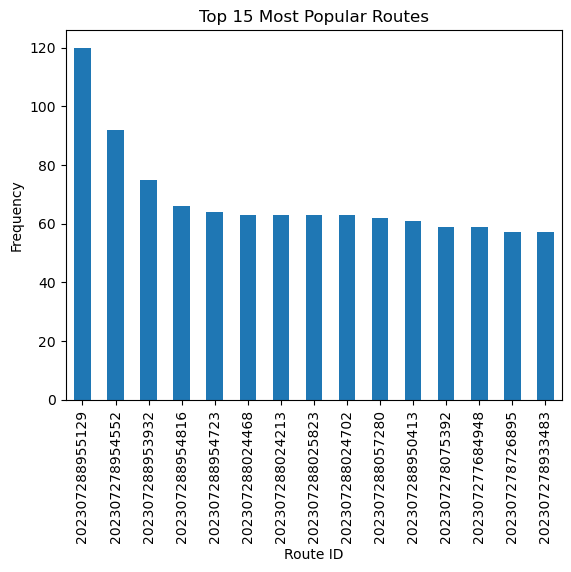

In [23]:
top_15_routes.plot(kind='bar')
plt.xlabel('Route ID')
plt.ylabel('Frequency')
plt.title('Top 15 Most Popular Routes')
plt.show()

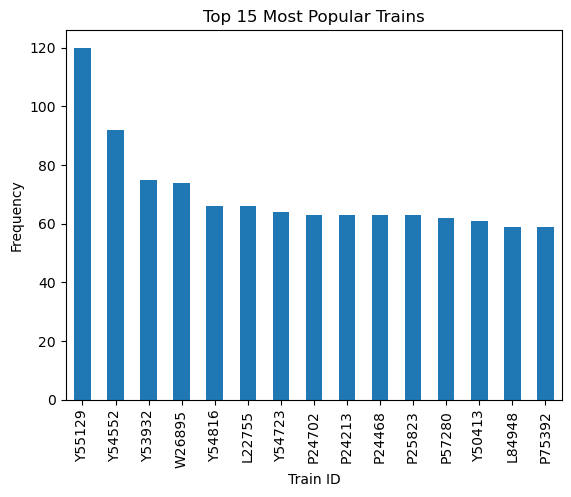

In [24]:
top_15_trains.plot(kind='bar')
plt.xlabel('Train ID')
plt.ylabel('Frequency')
plt.title('Top 15 Most Popular Trains')
plt.show()

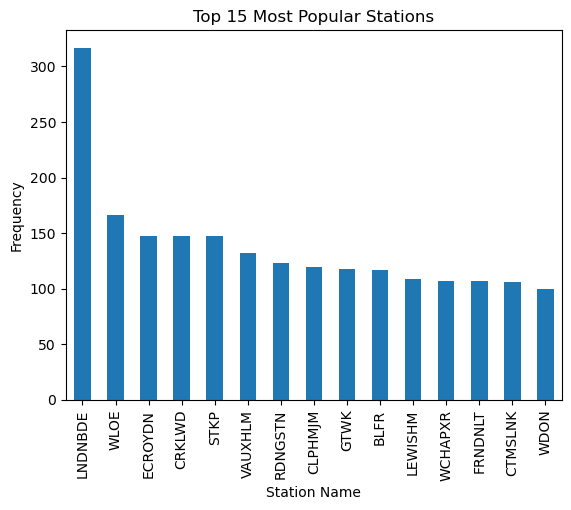

In [25]:
top_15_stations.plot(kind='bar')
plt.xlabel('Station Name')
plt.ylabel('Frequency')
plt.title('Top 15 Most Popular Stations')
plt.show()

In [ ]:
# Determining the busiest stations on a specific day (7/28/2023)

In [26]:
specific_date = df[df['service_start_date'] == '2023-07-28']

In [27]:
station_counts = specific_date['train_platform'].value_counts()

In [28]:
sorted_stations = station_counts.sort_values(ascending=False)

In [29]:
top_10_stations = sorted_stations.head(10)

In [30]:
top_10_stations

LNDNBDE    159
STKP        97
CRKLWD      88
WLOE        80
VAUXHLM     73
MKNSCEN     73
STAFFRD     65
LEWISHM     63
ECROYDN     61
RUGBY       58
Name: train_platform, dtype: int64

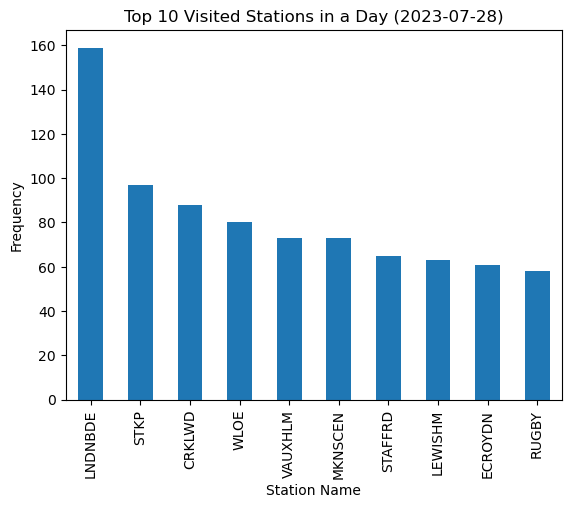

In [31]:
top_10_stations.plot(kind='bar')
plt.xlabel('Station Name')
plt.ylabel('Frequency')
plt.title('Top 10 Visited Stations in a Day (2023-07-28)')
plt.show()

In [32]:
# Another type of visual
top_10_labels = top_10_stations.index.tolist()

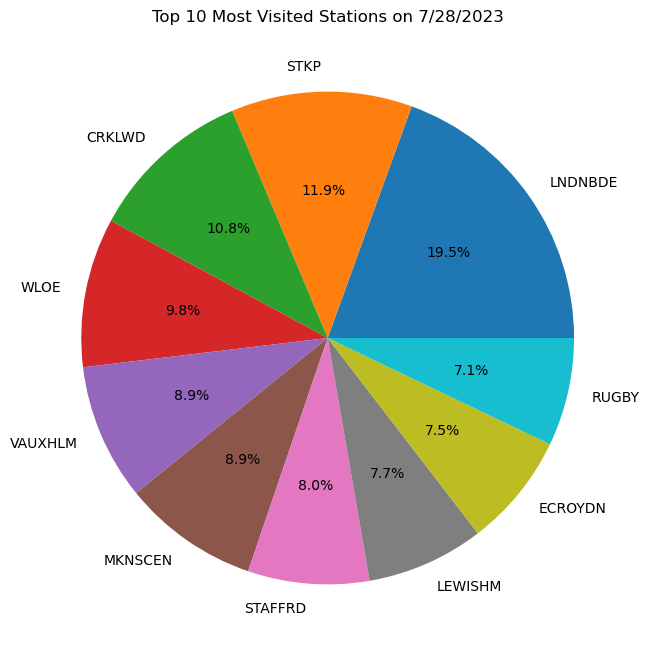

In [33]:
plt.figure(figsize=(8,8))
plt.pie(top_10_stations, labels=top_10_labels, autopct='%1.1f%%')
plt.title('Top 10 Most Visited Stations on 7/28/2023')
plt.show()

In [ ]:
# Analyzing Train Length to see if there is a correlation between the length of train and its arrival/departure delays.
# - Do longer trains tend to have more delays than shorter trains?

In [34]:
# Strting by cleaning the df to drop all rows that do not have a value in the train length column
clean_length_df = df.dropna(subset=['train_length'])

In [35]:
# Now you can see the train_length column has 0 null values (before it had 26505)
clean_length_df.isnull().sum()

route_id                      0
unique_id                     0
service_start_date            0
update_origin                10
train_platform                0
working_time_pass         10595
working_time_arrival          0
working_time_departure        0
planned_time_arrival        820
planned_time_departure      984
pass                      10595
platform                    501
train_length                  0
actual_arrival_time        2494
actual_departure_time      1361
is_delayed_arrival            0
is_delayed_departure          0
arrival_hour               2494
departure_hour             1361
dtype: int64

In [36]:
# Used .unique function to get all the unique values in the train_length column
clean_length_df.train_length.unique()

array(['8', '2', '5', '10', '6', '4', '12', '3', '7', '11', '9'],
      dtype=object)

In [37]:
# Counting how many of each train_length 
train_length_count = clean_length_df['train_length'].value_counts()
train_length_count

8     3076
5     1875
4     1574
10    1103
12    1054
3      866
6      566
2      425
7       45
11       6
9        5
Name: train_length, dtype: int64

In [38]:
# There is a total count of 10595 values in the train length column. 11 of them are unique and the most common value is 8.
# Since trains with 8 cars are the most common in this dataset we will find the average delay rate for each train length group.
clean_length_df.train_length.describe()

count     10595
unique       11
top           8
freq       3076
Name: train_length, dtype: object

In [39]:
clean_length_df['is_delayed_arrival'].value_counts()
# There are 573 trains that have a delayed arrival

False    10022
True       573
Name: is_delayed_arrival, dtype: int64

In [40]:
delayed_arrivals = clean_length_df[clean_length_df['is_delayed_arrival'] == True]['train_length'].value_counts().sort_values(ascending=True)
delayed_arrivals
# Here are the train_lengths and how many times they were had a delayed arrival

10     12
3      31
12     46
6      53
5      57
4      90
8     284
Name: train_length, dtype: int64

In [41]:
# Creating the average time the trains were delayed by train length 
average_arrival_delay_percentage = clean_length_df.groupby('train_length')['is_delayed_arrival'].mean()*100

In [42]:
sorted_arrival_avg = average_arrival_delay_percentage.sort_values()
sorted_arrival_avg
# trains that have a length of 10 cars have a delayed arrival 1.08% of the time. 

train_length
11    0.000000
2     0.000000
7     0.000000
9     0.000000
10    1.087942
5     3.040000
3     3.579677
12    4.364326
4     5.717916
8     9.232770
6     9.363958
Name: is_delayed_arrival, dtype: float64

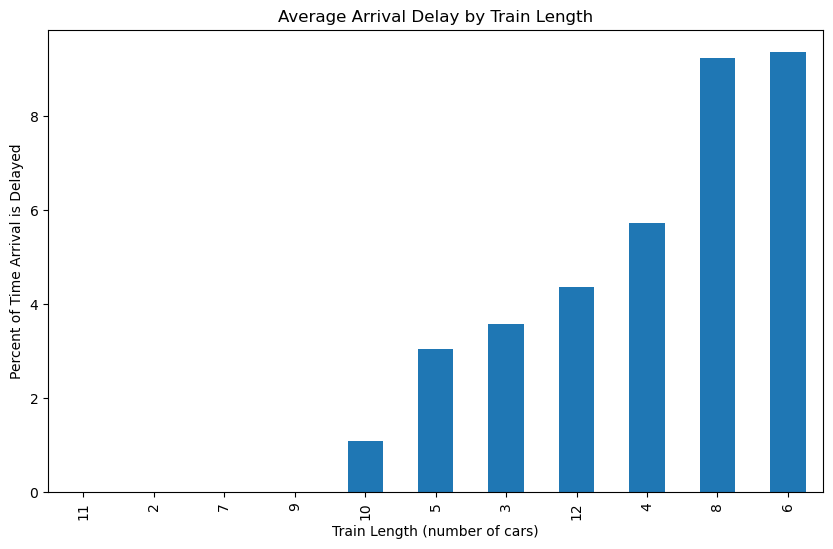

In [43]:
sorted_arrival_avg.plot.bar(y='is_delayed_arrival', figsize=(10,6))
plt.xlabel('Train Length (number of cars)')
plt.ylabel('Percent of Time Arrival is Delayed')
plt.title('Average Arrival Delay by Train Length')
plt.show()

In [ ]:
# Now doing the same steps but this time for delayed departure

In [44]:
clean_length_df['is_delayed_departure'].value_counts()
# There are 640 trains that have a delayed departure

False    9955
True      640
Name: is_delayed_departure, dtype: int64

In [45]:
delayed_departures = clean_length_df[clean_length_df['is_delayed_departure'] == True]['train_length'].value_counts().sort_values(ascending=True)
delayed_departures

10     13
3      38
12     50
6      56
5      59
4      99
8     325
Name: train_length, dtype: int64

In [46]:
average_depart_delay_percentage = clean_length_df.groupby('train_length')['is_delayed_departure'].mean()*100

In [47]:
sorted_depart_avg = average_depart_delay_percentage.sort_values()
sorted_depart_avg

train_length
11     0.000000
2      0.000000
7      0.000000
9      0.000000
10     1.178604
5      3.146667
3      4.387991
12     4.743833
4      6.289708
6      9.893993
8     10.565670
Name: is_delayed_departure, dtype: float64

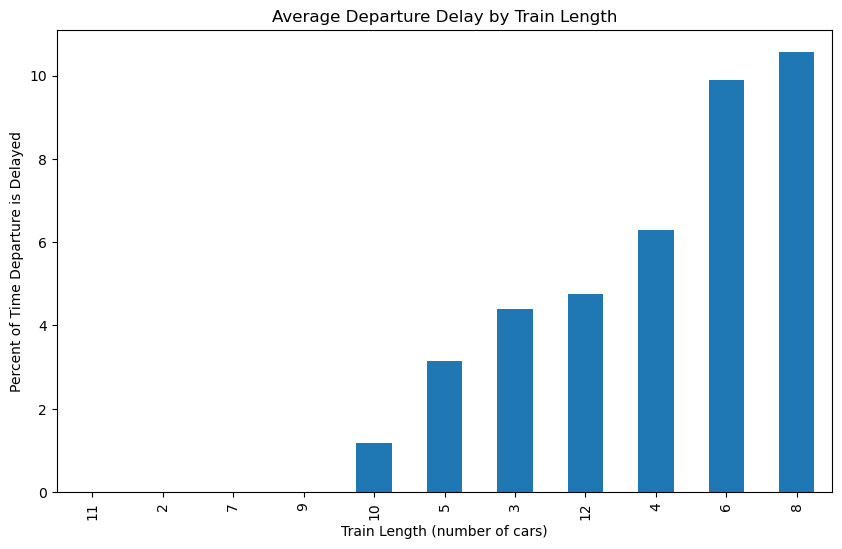

In [48]:
sorted_depart_avg.plot.bar(y='is_delayed_departure', figsize=(10, 6))
plt.xlabel('Train Length (number of cars)')
plt.ylabel('Percent of Time Departure is Delayed')
plt.title('Average Departure Delay by Train Length')
plt.show()

In [ ]:
# Time Analysis - Comparing planned and actual arrival & departure times

In [49]:
# creating a new column called arrival time difference
df['arrival_time_difference'] = df['actual_arrival_time'] - df['working_time_arrival']

In [50]:
df['arrival_time_difference'] = df['arrival_time_difference'].dt.total_seconds() / 60
# converting the time difference to minutes

In [51]:
# creating a new column called departure time difference
df['departure_time_difference'] = df['actual_departure_time'] - df['working_time_departure']

In [52]:
df['departure_time_difference'] = df['departure_time_difference'].dt.total_seconds() / 60
# converting the time difference to minutes

In [59]:
df.head(10)

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure,arrival_hour,departure_hour,arrival_time_difference,departure_time_difference,arrival_month,departure_month
8,202307277679020,L79020,2023-07-27,Darwin,STFD,NaT,2023-07-27 00:03:00,2023-07-27 00:03:30,NaT,NaT,...,2023-07-27 00:53:00,2023-07-27 00:53:00,True,True,0.0,0.0,50.0,49.5,7,7
10,202307277679020,L79020,2023-07-27,Darwin,SPNY205,NaT,2023-07-27 00:07:00,2023-07-27 00:13:30,NaT,NaT,...,2023-07-27 00:57:00,2023-07-27 00:58:00,True,True,0.0,0.0,50.0,44.5,7,7
16,202307277679020,L79020,2023-07-27,Darwin,PADTLL,NaT,2023-07-27 00:30:30,2023-07-27 00:31:00,NaT,NaT,...,2023-07-27 01:07:00,2023-07-27 01:07:00,True,True,1.0,1.0,36.5,36.0,7,7
17,202307277679020,L79020,2023-07-27,Darwin,WBRNPKS,NaT,2023-07-27 00:33:00,2023-07-27 00:35:00,NaT,NaT,...,2023-07-27 01:09:00,2023-07-27 01:10:00,True,True,1.0,1.0,36.0,35.0,7,7
22,202307277674553,L74553,2023-07-27,TD,SVNOAKS,NaT,2023-07-27 21:53:00,2023-07-27 21:54:30,2023-07-27 21:53:00,2023-07-27 21:54:00,...,NaT,NaT,False,False,NaN,NaN,NaN,NaN,7,7
25,202307277679633,L79633,2023-07-27,TD,STFD,NaT,2023-07-27 19:42:30,2023-07-27 19:43:30,2023-07-27 19:43:00,2023-07-27 19:43:00,...,2023-07-27 19:43:00,2023-07-27 19:44:00,False,False,19.0,19.0,0.5,0.5,7,7
26,202307277679633,L79633,2023-07-27,TD,MRYLAND,NaT,2023-07-27 19:45:00,2023-07-27 19:45:30,2023-07-27 19:45:00,2023-07-27 19:45:00,...,2023-07-27 19:45:00,2023-07-27 19:46:00,False,False,19.0,19.0,0.0,0.5,7,7
27,202307277679633,L79633,2023-07-27,TD,FRSTGT,NaT,2023-07-27 19:47:00,2023-07-27 19:47:30,2023-07-27 19:47:00,2023-07-27 19:47:00,...,2023-07-27 19:47:00,2023-07-27 19:48:00,False,False,19.0,19.0,0.0,0.5,7,7
29,202307277679633,L79633,2023-07-27,TD,MANRPK,NaT,2023-07-27 19:49:30,2023-07-27 19:50:00,2023-07-27 19:50:00,2023-07-27 19:50:00,...,2023-07-27 19:50:00,2023-07-27 19:50:00,False,False,19.0,19.0,0.5,0.0,7,7
30,202307277679633,L79633,2023-07-27,TD,ILFORD,NaT,2023-07-27 19:52:00,2023-07-27 19:53:00,2023-07-27 19:52:00,2023-07-27 19:53:00,...,2023-07-27 19:52:00,2023-07-27 19:53:00,False,False,19.0,19.0,0.0,0.0,7,7


In [60]:
# Creating a new df that has no null values for the times. 
clean_df = df.dropna(subset=['working_time_arrival', 'actual_arrival_time','working_time_departure', 'actual_departure_time',
                             'route_id', 'unique_id','train_platform'])

In [61]:
clean_df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure,arrival_hour,departure_hour,arrival_time_difference,departure_time_difference,arrival_month,departure_month
8,202307277679020,L79020,2023-07-27,Darwin,STFD,NaT,2023-07-27 00:03:00,2023-07-27 00:03:30,NaT,NaT,...,2023-07-27 00:53:00,2023-07-27 00:53:00,True,True,0.0,0.0,50.0,49.5,7,7
10,202307277679020,L79020,2023-07-27,Darwin,SPNY205,NaT,2023-07-27 00:07:00,2023-07-27 00:13:30,NaT,NaT,...,2023-07-27 00:57:00,2023-07-27 00:58:00,True,True,0.0,0.0,50.0,44.5,7,7
16,202307277679020,L79020,2023-07-27,Darwin,PADTLL,NaT,2023-07-27 00:30:30,2023-07-27 00:31:00,NaT,NaT,...,2023-07-27 01:07:00,2023-07-27 01:07:00,True,True,1.0,1.0,36.5,36.0,7,7
17,202307277679020,L79020,2023-07-27,Darwin,WBRNPKS,NaT,2023-07-27 00:33:00,2023-07-27 00:35:00,NaT,NaT,...,2023-07-27 01:09:00,2023-07-27 01:10:00,True,True,1.0,1.0,36.0,35.0,7,7
25,202307277679633,L79633,2023-07-27,TD,STFD,NaT,2023-07-27 19:42:30,2023-07-27 19:43:30,2023-07-27 19:43:00,2023-07-27 19:43:00,...,2023-07-27 19:43:00,2023-07-27 19:44:00,False,False,19.0,19.0,0.5,0.5,7,7


In [62]:
mean_arrival_difference = clean_df['arrival_time_difference'].mean()
median_arrival_difference = clean_df['arrival_time_difference'].median()
std_arrival_difference =  clean_df['arrival_time_difference'].std()

print("Mean Arrival Time Difference:", mean_arrival_difference, "minutes")
print("Median Arrival Time Difference:", median_arrival_difference, "minutes")
print("Standard Deviation of Arrival Time Difference:", std_arrival_difference, "minutes")

Mean Arrival Time Difference: -8.49809081363159 minutes
Median Arrival Time Difference: 0.5 minutes
Standard Deviation of Arrival Time Difference: 142.64946795731805 minutes


In [63]:
df['arrival_month'] = df['working_time_arrival'].dt.month
df['departure_month'] = df['working_time_departure'].dt.month

In [64]:
avg_arrival_time_diff_by_month = clean_df.groupby('arrival_month')['arrival_time_difference'].mean()
avg_arrival_time_diff_by_month
# The negative value indicates that on average the trains are arriving earlier than the planned time 

arrival_month
7   -8.498091
Name: arrival_time_difference, dtype: float64

In [65]:
avg_departure_time_diff_by_month = clean_df.groupby('departure_month')['departure_time_difference'].mean()
avg_departure_time_diff_by_month
# The negative value indicates that on average the trains are departing earlier than the planned time 

departure_month
7   -8.874726
Name: departure_time_difference, dtype: float64

In [67]:
std_arrival_time_diff = clean_df['arrival_time_difference'].std()
std_arrival_time_diff
# A higher standard deviation means there is a lot of variance in the time difference column. For example, some time differences are much longer or shorter than the average. 

142.64946795731805

In [68]:
std_departure_time_diff = clean_df['departure_time_difference'].std()
std_departure_time_diff

145.08413183638646

In [ ]:
# Import numpy as np
# np.abs()